In [1]:
!wget 'http://www-eio.upc.edu/~pau/cms/rdata/csv/KMsurv/lung.csv'

--2020-07-23 13:06:32--  http://www-eio.upc.edu/~pau/cms/rdata/csv/KMsurv/lung.csv
Resolving www-eio.upc.edu (www-eio.upc.edu)... 147.83.24.219
Connecting to www-eio.upc.edu (www-eio.upc.edu)|147.83.24.219|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7856 (7.7K) [text/csv]
Saving to: ‘lung.csv’

lung.csv            100%[===================>]   7.67K  --.-KB/s    in 0s      

2020-07-23 13:06:33 (34.9 MB/s) - ‘lung.csv’ saved [7856/7856]



In [ ]:
!pip install lifelines

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from lifelines import KaplanMeierFitter

In [4]:
data = pd.read_csv('/content/lung.csv')
data

,Unnamed: 0,inst,time,status,age,sex,ph.ecog,ph.karno,pat.karno,meal.cal,wt.loss
0,1,3.0,306,2,74,1,1.0,90.0,100.0,1175.0,NaN
1,2,3.0,455,2,68,1,0.0,90.0,90.0,1225.0,15.0
2,3,3.0,1010,1,56,1,0.0,90.0,90.0,NaN,15.0
3,4,5.0,210,2,57,1,1.0,90.0,60.0,1150.0,11.0
4,5,1.0,883,2,60,1,0.0,100.0,90.0,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...
223,224,1.0,188,1,77,1,1.0,80.0,60.0,NaN,3.0
224,225,13.0,191,1,39,1,0.0,90.0,90.0,2350.0,-5.0
225,226,32.0,105,1,75,2,2.0,60.0,70.0,1025.0,5.0
226,227,6.0,174,1,66,1,1.0,90.0,100.0,1075.0,1.0


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 228 entries, 0 to 227
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  228 non-null    int64  
 1   inst        227 non-null    float64
 2   time        228 non-null    int64  
 3   status      228 non-null    int64  
 4   age         228 non-null    int64  
 5   sex         228 non-null    int64  
 6   ph.ecog     227 non-null    float64
 7   ph.karno    227 non-null    float64
 8   pat.karno   225 non-null    float64
 9   meal.cal    181 non-null    float64
 10  wt.loss     214 non-null    float64
 11  dead        228 non-null    float64
dtypes: float64(7), int64(5)
memory usage: 21.5 KB


In [51]:
a = data['meal.cal'].fillna(data['meal.cal'].mean())

In [ ]:
data.drop(columns=['meal.cal'])

In [ ]:
data['meal.cal'] = a
data

In [ ]:
data.describe()

In [ ]:
data['sex'].hist()

In [35]:
kmf = KaplanMeierFitter()

In [68]:
data.loc[data.status==1,'dead'] = 0
data.loc[data.status==2,'dead'] = 1
data.head()

,Unnamed: 0,inst,time,status,age,sex,ph.ecog,ph.karno,pat.karno,meal.cal,wt.loss,dead
0,1,3.0,306,2,74,1,1.0,90.0,100.0,1175.000000,NaN,1.0
1,2,3.0,455,2,68,1,0.0,90.0,90.0,1225.000000,15.0,1.0
2,3,3.0,1010,1,56,1,0.0,90.0,90.0,928.779006,15.0,0.0
3,4,5.0,210,2,57,1,1.0,90.0,60.0,1150.000000,11.0,1.0
4,5,1.0,883,2,60,1,0.0,100.0,90.0,928.779006,0.0,1.0


In [67]:
kmf.fit(durations=data['time'],event_observed=data['dead'])

<lifelines.KaplanMeierFitter:"KM_estimate", fitted with 228 total observations, 63 right-censored observations>

In [38]:
kmf.event_table

,removed,observed,censored,entrance,at_risk
event_at,,,,,
0.0,0,0,0,228,228
5.0,1,1,0,0,228
11.0,3,3,0,0,227
12.0,1,1,0,0,224
13.0,2,2,0,0,223
...,...,...,...,...,...
840.0,1,0,1,0,5
883.0,1,1,0,0,4
965.0,1,0,1,0,3


In [ ]:
data.dropna()

,Unnamed: 0,inst,time,status,age,sex,ph.ecog,ph.karno,pat.karno,meal.cal,wt.loss,dead
0,1,3.0,306,2,74,1,1.0,90.0,100.0,1175.0,NaN,1.0
1,2,3.0,455,2,68,1,0.0,90.0,90.0,1225.0,15.0,1.0
2,3,3.0,1010,1,56,1,0.0,90.0,90.0,NaN,15.0,0.0
3,4,5.0,210,2,57,1,1.0,90.0,60.0,1150.0,11.0,1.0
4,5,1.0,883,2,60,1,0.0,100.0,90.0,NaN,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
223,224,1.0,188,1,77,1,1.0,80.0,60.0,NaN,3.0,0.0
224,225,13.0,191,1,39,1,0.0,90.0,90.0,2350.0,-5.0,0.0
225,226,32.0,105,1,75,2,2.0,60.0,70.0,1025.0,5.0,0.0
226,227,6.0,174,1,66,1,1.0,90.0,100.0,1075.0,1.0,0.0


In [60]:
kmf.fit(durations=data['meal.cal'],event_observed=data['dead'])
kmf.event_table

,removed,observed,censored,entrance,at_risk
event_at,,,,,
0.0,0,0,0,228,228
96.0,1,0,1,0,228
131.0,1,0,1,0,227
169.0,1,1,0,0,226
238.0,1,1,0,0,225
...,...,...,...,...,...
1500.0,4,3,1,0,9
2200.0,1,1,0,0,5
2350.0,1,0,1,0,4


In [41]:
event_at_0 = kmf.event_table.iloc[0,:]
surv_for_0 = (event_at_0.at_risk - event_at_0.observed)/event_at_0.at_risk
surv_for_0

1.0

In [42]:
event_at_5 = kmf.event_table.iloc[1,:]
surv_for_5 = (event_at_5.at_risk - event_at_5.observed)/event_at_5.at_risk
surv_for_5

1.0

In [43]:
event_at_11 = kmf.event_table.iloc[2,:]
surv_for_11 = (event_at_11.at_risk - event_at_11.observed)/event_at_11.at_risk
surv_for_11

0.995575221238938

In [33]:
surv_after_5 = surv_for_0 * surv_for_5
surv_after_11 = surv_for_0 * surv_for_5 * surv_for_11

In [34]:
print(surv_after_5)
print(surv_after_11)

0.9956140350877193
0.9824561403508771


In [61]:
kmf.survival_function_

,KM_estimate
timeline,
0.0,1.000000
96.0,1.000000
131.0,1.000000
169.0,0.995575
238.0,0.991150
...,...
1500.0,0.064371
2200.0,0.051497
2350.0,0.051497


In [62]:
kmf.median_survival_time_

1025.0

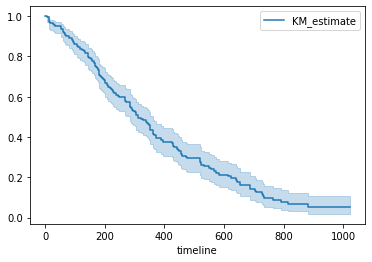

In [69]:
kmf.plot()

In [70]:
kmf.confidence_interval_

,KM_estimate_lower_0.95,KM_estimate_upper_0.95
0.0,1.000000,1.000000
5.0,0.969277,0.999381
11.0,0.953935,0.993379
12.0,0.948120,0.990813
13.0,0.936682,0.985244
...,...,...
840.0,0.030728,0.123060
883.0,0.017866,0.108662
965.0,0.017866,0.108662
1010.0,0.017866,0.108662


In [65]:
kmf.cumulative_density_

,KM_estimate
timeline,
0.0,0.000000
96.0,0.000000
131.0,0.000000
169.0,0.004425
238.0,0.008850
...,...
1500.0,0.935629
2200.0,0.948503
2350.0,0.948503


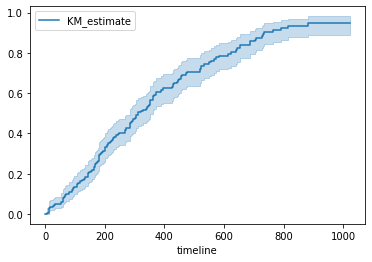

In [71]:
kmf.plot_cumulative_density()

In [49]:
from lifelines import NelsonAalenFitter
naf = NelsonAalenFitter()
naf.fit(data['time'], event_observed = data['dead'])

<lifelines.NelsonAalenFitter:"NA_estimate", fitted with 228 total observations, 63 right-censored observations>

In [ ]:
naf.event_table

In [51]:
naf.cumulative_hazard_

,NA_estimate
timeline,
0.0,0.000000
5.0,0.004386
11.0,0.017660
12.0,0.022125
13.0,0.031114
...,...
840.0,2.641565
883.0,2.891565
965.0,2.891565


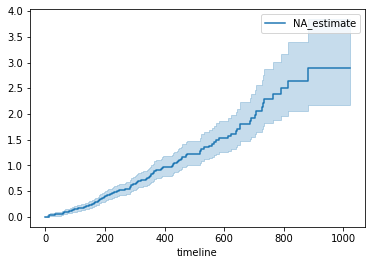

In [55]:
naf.plot_cumulative_hazard()